# 1. Data Loading

In [417]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# =============================================
# DataLoader Class (CSV + Excel)
# =============================================
class DataLoader:
    """Loads data from CSV or Excel files."""
    def __init__(self, filepath: str = None):
        self.filepath = filepath
        
    def load_csv(self, file_path: str) -> pd.DataFrame:
        """Load a CSV file into a DataFrame."""
        df = pd.read_csv(file_path)
        return df
    
    def load_excel(self, file_path: str, sheet_name: str = None) -> pd.DataFrame:
        """Load an Excel sheet into a DataFrame."""
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        return df
        

In [418]:
data_loader = DataLoader()   

In [419]:
Orders_df = data_loader.load_excel(r"C:\Users\ajibo\Downloads\0. Rebrand\IT Projects\0. project portfolio\RetailNexus_Corp_Analytics\RetailNexus_Corp_Raw_Dataset.xlsx", sheet_name="Orders")
print (Orders_df.head(2))

   Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0       1  CA-2018-152156 2018-11-08 2018-11-11  Second Class    CG-12520   
1       2  CA-2018-152156 2018-11-08 2018-11-11  Second Class    CG-12520   

  Customer Name   Segment Country/Region       City  ... Postal Code  Region  \
0   Claire Gute  Consumer  United States  Henderson  ...     42420.0   South   
1   Claire Gute  Consumer  United States  Henderson  ...     42420.0   South   

        Product ID   Category Sub-Category  \
0  FUR-BO-10001798  Furniture    Bookcases   
1  FUR-CH-10000454  Furniture       Chairs   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  

[2 rows x 21 columns]


C:\Users\ajibo\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [420]:
Orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

# 2. Data Familiarization

In [421]:
import matplotlib.pyplot as plt

class DataFamiliarization:
    """To familiarize with the datasets"""
    
    @staticmethod
    def general_information(dataset_name):
        """Show .info() for the specified dataset"""
        df_info = dataset_name.info()
        return df_info

    @staticmethod
    def summary_statistics(dataset_name):
        """Show summary statistics for the specified dataset"""
        df_summary = dataset_name.describe()
        return df_summary

    @staticmethod
    def check_missing_values(dataset_name):
        """Check for null/missing values in all columns."""
        missing = dataset_name.isnull().sum()
        return missing

    @staticmethod
    def check_duplicated_rows(dataset_name):
        """Returns the total count of fully duplicated rows."""
        duplicate = dataset_name.duplicated().sum()
        return duplicate
    
    
    @staticmethod
    def show_valueCounts(df, column):
        """Show summary statistics for the specified dataset"""
        if column in df.columns:
            return df[column].value_counts(dropna=False)
        else:
            print(f"Column '{column}' not found.")
            return None
            
 
    @staticmethod
    def show_chart(df, column, chart_type):
        """Show chart for a column using specified chart type"""
        if column not in df.columns:
            print(f"Column '{column}' not found.")
            return
        df[[column]].plot(kind=chart_type, figsize=(6, 4), color='skyblue')
        plt.title(f'{chart_type.capitalize()} Chart of {column} column')
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

In [422]:
DataFamiliarization.general_information(Orders_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [423]:
DataFamiliarization.summary_statistics(Orders_df)

Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2018-04-30 10:03:51.979187712   
min       1.000000            2016-01-03 00:00:00   
25%    2499.250000            2017-05-23 00:00:00   
50%    4997.500000            2018-06-26 00:00:00   
75%    7495.750000            2019-05-14 00:00:00   
max    9994.000000            2019-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9983.000000   9994.000000  9994.000000   
mean   2018-05-04 09:03:29.645787392  55245.233297    229.858001     3.789574   
min              2016-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2017-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2018-06-29 00:00:00  57103.000000     54.490000     3.000000   
75%              2019-05-18 00:00:00  90008.000000    209.940000     5.000000   
max              2020-01-05 00:00:00  99301.000000  22638.480000    14.000000   
std                              NaN  32038.715955    623.245101     2.225110   

          Discount       Profit  
count  9994.000000  9994.000000  
mean      0.156203    28.656896  
min       0.000000 -6599.978000  
25%       0.000000     1.728750  
50%       0.200000     8.666500  
75%       0.200000    29.364000  
max       0.800000  8399.976000  
std       0.206452   234.260108

In [424]:
print (DataFamiliarization.check_missing_values(Orders_df))

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64


In [425]:
print (DataFamiliarization.check_duplicated_rows(Orders_df))

0


In [426]:
DataFamiliarization.show_valueCounts(Orders_df, 'Sales')

Sales
12.960     56
19.440     39
15.552     39
10.368     36
32.400     28
           ..
825.174     1
569.536     1
796.425     1
12.832      1
243.160     1
Name: count, Length: 6144, dtype: int64

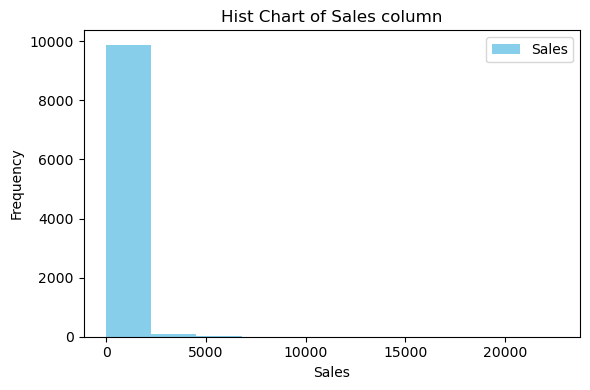

In [427]:
DataFamiliarization.show_chart(Orders_df, 'Sales', 'hist')

In [428]:
Orders_df['Sales'].skew()

12.972752341816228

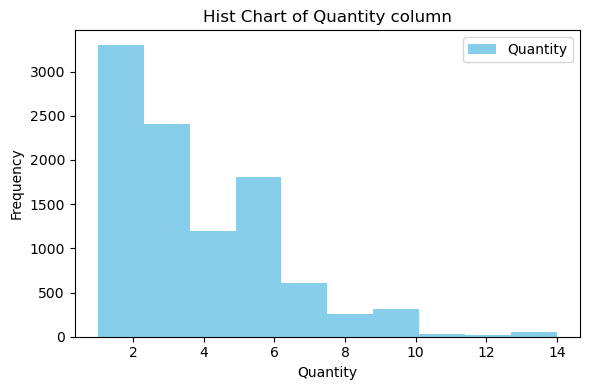

In [429]:
DataFamiliarization.show_chart(Orders_df, 'Quantity', 'hist')

In [430]:
Orders_df['Quantity'].skew()

1.2785447527223421

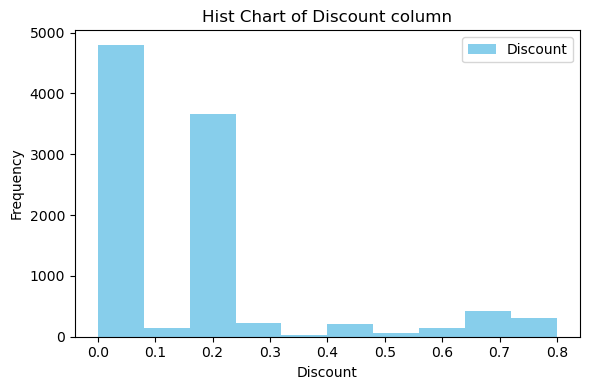

In [431]:
DataFamiliarization.show_chart(Orders_df, 'Discount', 'hist')

In [432]:
Orders_df['Discount'].skew()

1.6842947474238648

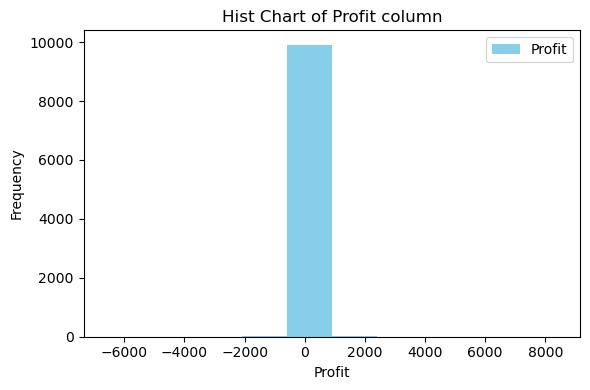

In [433]:
DataFamiliarization.show_chart(Orders_df, 'Profit', 'hist')

In [434]:
Orders_df['Profit'].skew()

7.561431562468336

# 3. Data Cleaning

In [435]:
class DataCleaner:
    """To familiarize with the datasets"""
    
    @staticmethod
    def drop_missing_data(dataset_name):
        """drop missing values in the DataFrame"""
        dataset_drop = dataset_name.dropna()
        return dataset_drop

    @staticmethod
    def drop_duplicate_data(dataset_name):
        """drop missing values in the DataFrame"""
        dataset_name = dataset_name.drop_duplicates()
        return dataset_name
    

In [436]:
DataFamiliarization.general_information(Orders_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [437]:
Orders_df = DataCleaner.drop_missing_data(Orders_df)

In [438]:
Orders_df = DataCleaner.drop_missing_data(Orders_df)

In [439]:
Orders_df = DataCleaner.drop_duplicate_data(Orders_df)

In [440]:
Orders_df = DataCleaner.drop_duplicate_data(Orders_df)

In [441]:
DataFamiliarization.general_information(Orders_df)

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9983 non-null   int64         
 1   Order ID        9983 non-null   object        
 2   Order Date      9983 non-null   datetime64[ns]
 3   Ship Date       9983 non-null   datetime64[ns]
 4   Ship Mode       9983 non-null   object        
 5   Customer ID     9983 non-null   object        
 6   Customer Name   9983 non-null   object        
 7   Segment         9983 non-null   object        
 8   Country/Region  9983 non-null   object        
 9   City            9983 non-null   object        
 10  State           9983 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9983 non-null   object        
 13  Product ID      9983 non-null   object        
 14  Category        9983 non-null   object        
 15  Sub-Categ

# 4. Data Transformation

In [442]:
from sklearn.preprocessing import LabelEncoder

class DataTransformer:
    """Handles data transformation tasks for clean modeling and EDA."""
    
    @staticmethod
    def extract_date_parts(df, date_column: str):
        """Extract year, month, day, weekday from a datetime column."""
        df[date_column + '_Year'] = df[date_column].dt.year
        df[date_column + '_Month'] = df[date_column].dt.month
        df[date_column + '_Day'] = df[date_column].dt.day
        df[date_column + '_Weekday'] = df[date_column].dt.day_name()
        return df

    @staticmethod
    def label_encode(df, columns: list):
        """Label encode a list of categorical columns."""
        le = LabelEncoder()
        for col in columns:
            df[col + '_Encoded'] = le.fit_transform(df[col])
        return df


In [443]:
Orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9983 non-null   int64         
 1   Order ID        9983 non-null   object        
 2   Order Date      9983 non-null   datetime64[ns]
 3   Ship Date       9983 non-null   datetime64[ns]
 4   Ship Mode       9983 non-null   object        
 5   Customer ID     9983 non-null   object        
 6   Customer Name   9983 non-null   object        
 7   Segment         9983 non-null   object        
 8   Country/Region  9983 non-null   object        
 9   City            9983 non-null   object        
 10  State           9983 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9983 non-null   object        
 13  Product ID      9983 non-null   object        
 14  Category        9983 non-null   object        
 15  Sub-Categ

In [444]:
Orders_df = DataTransformer.extract_date_parts(Orders_df,'Order Date')

In [445]:
Orders_df = DataTransformer.label_encode(Orders_df, ['Segment','Category','Region','Ship Mode','Sub-Category'])

In [446]:
Orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 9993
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9983 non-null   int64         
 1   Order ID              9983 non-null   object        
 2   Order Date            9983 non-null   datetime64[ns]
 3   Ship Date             9983 non-null   datetime64[ns]
 4   Ship Mode             9983 non-null   object        
 5   Customer ID           9983 non-null   object        
 6   Customer Name         9983 non-null   object        
 7   Segment               9983 non-null   object        
 8   Country/Region        9983 non-null   object        
 9   City                  9983 non-null   object        
 10  State                 9983 non-null   object        
 11  Postal Code           9983 non-null   float64       
 12  Region                9983 non-null   object        
 13  Product ID            9

# 5. Exploratory Data Analysis (EDA)¬∂

In [447]:
import matplotlib.pyplot as plt
import seaborn as sns

class Explorer:
    """Simple EDA class for visualizations using matplotlib and seaborn."""

    @staticmethod
    def plot_bar_count(df, column: str):
        """Plot bar count of a categorical column."""
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_histogram(df, column: str, bins: int = 30):
        """Plot histogram of a numerical column."""
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], bins=bins, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_boxplot(df, x_col: str, y_col: str):
        """Plot boxplot to compare distributions across categories."""
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df, x=x_col, y=y_col)
        plt.title(f'{y_col} by {x_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_scatter(df, x_col: str, y_col: str):
        """Plot scatter plot for two numerical columns."""
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=df, x=x_col, y=y_col)
        plt.title(f'{y_col} vs {x_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_line_trend(df, date_col: str, value_col: str):
        """Plot trend line of a numerical column over a datetime column."""
        df_temp = df.copy()
        df_temp[date_col] = pd.to_datetime(df_temp[date_col])
        df_grouped = df_temp.groupby(date_col)[value_col].sum().reset_index()

        plt.figure(figsize=(10, 5))
        sns.lineplot(data=df_grouped, x=date_col, y=value_col)
        plt.title(f'{value_col} Over Time')
        plt.xlabel('Date')
        plt.ylabel(value_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_num_vs_cat(df, x_col: str, y_col: str, fig_w: int,fig_l: int):
        """plot numerical vs categorical variable."""
        plt.figure(figsize=(fig_w,fig_l))
        sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')
        plt.title(f'{x_col} vs {y_col} ')
        plt.xlabel(f'{x_col}')
        plt.ylabel(f'{y_col}')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.4)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_num_vs_cat_oo(df, x_col: str, y_col: str):
        plt.figure(figsize=(14, 7))
        sns.barplot(x='Sub-Category', y='Quantity', data=Orders_df, estimator=sum, palette='magma')
        plt.title('Total Profit by Sub-Category')
        plt.xlabel('Sub-Category')
        plt.ylabel('Total Quantity')
        plt.xticks(rotation=90, ha='right') # Rotate labels for readability
        plt.grid(axis='y', linestyle='--', alpha=0.4)
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show()

    @staticmethod
    def plot_correlation_heatmap(df, numeric_cols: list):
        """Plot correlation heatmap of numeric features."""
        plt.figure(figsize=(10, 6))
        corr = df[numeric_cols].corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title('Correlation Heatmap')
        plt.tight_layout()
        plt.show()


## 1. Univariate Analysis¬∂

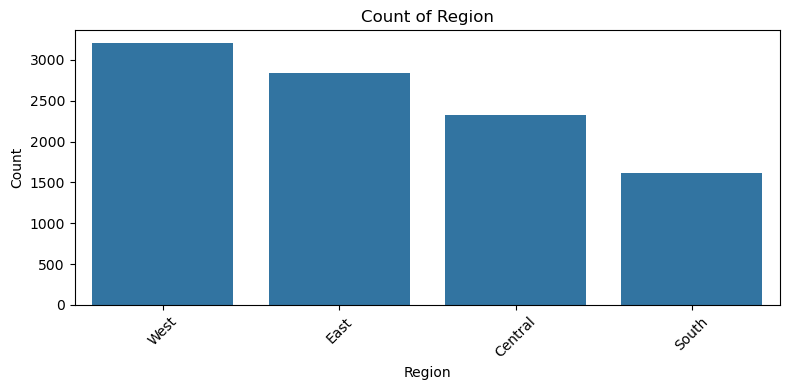

In [448]:
Explorer.plot_bar_count(Orders_df, 'Region')

---

##### üåç 1. **Region Count**

* **Observation:**

  * **West** and **East** regions have the most transactions
  * **South** has the least

**üìå Business Insight:**

* West/East are high-activity regions ‚Äî good candidates for upselling or faster delivery incentives.
* South may need outreach or regional campaigns to boost engagement.

---

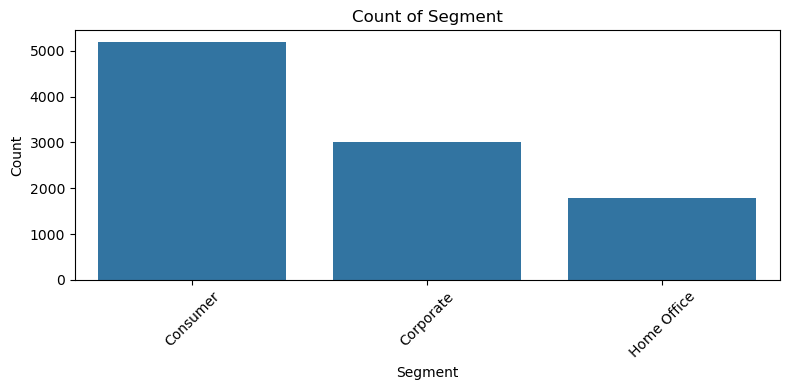

In [449]:
Explorer.plot_bar_count(Orders_df, 'Segment')

---

##### üßë‚Äçüíº 2. **Segment Count**

* **Observation:**

  * **Consumer** segment dominates, followed by **Corporate**, then **Home Office**

**üìå Business Insight:**

* Strong reliance on individual consumers.
* There's potential to expand B2B strategies for corporate and home office clients via tailored marketing or loyalty programs.

---

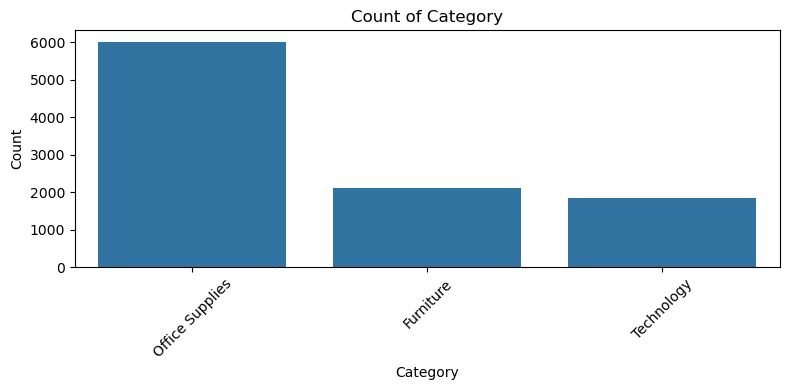

In [450]:
Explorer.plot_bar_count(Orders_df, 'Category')

---

##### üìÅ 3. **Category Count**

* **Observation:**

  * All 3 categories are represented almost evenly:

    * **Office Supplies** slightly leads
    * Followed by **Furniture** and **Technology**

**üìå Business Insight:**

* Demand is spread fairly evenly across major product lines ‚Äî RetailNexus serves diverse customer needs.
* Consider offering cross-category bundles (e.g., Furniture + Office Supplies).

---

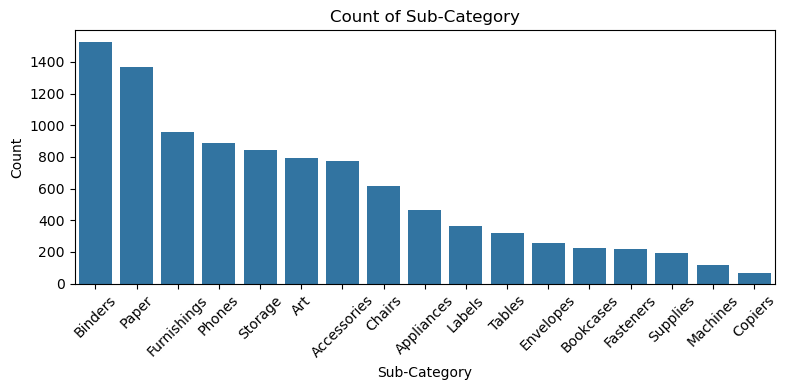

In [451]:
Explorer.plot_bar_count(Orders_df, 'Sub-Category')

---

##### üóÇÔ∏è 4. **Sub-Category Count**

* **Observation:**

  * **Binders, Paper, Furnishings** dominate.
  * Niche items like **Tables, Copiers, Appliances** have fewer orders.

**üìå Business Insight:**

* Consider optimizing inventory for top sub-categories.
* For low-frequency items, evaluate their margin vs. storage cost and explore made-to-order models.

---

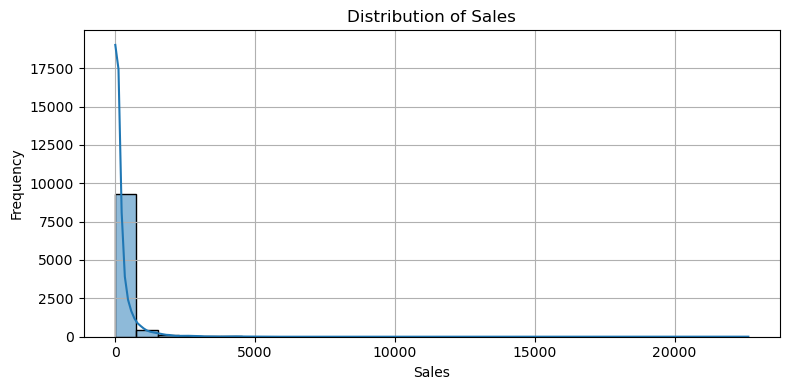

In [452]:
Explorer.plot_histogram(Orders_df, 'Sales')

---

##### üìä 1. **Sales Distribution**

* **Pattern:** Right-skewed distribution.
* **Most sales orders** are under a certain threshold (likely <\$500), while a few go into very high values.
* **KDE curve** confirms a long tail ‚Äî indicating rare high-value sales.

**üìå Business Insight:**

* Most transactions are small to mid-sized ‚Äî ideal for bulk-volume strategies.
* Consider targeted strategies for high-ticket clients (e.g., loyalty perks or specialized support).

---

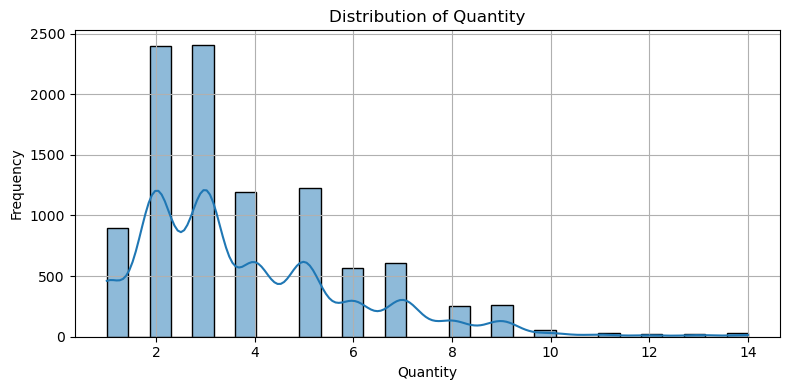

In [453]:
Explorer.plot_histogram(Orders_df, 'Quantity')

---

##### üì¶ 2. **Quantity Distribution**

* **Pattern:** Sharp left-skew with a peak around 2‚Äì3 units per order.
* Majority of orders contain very few items.

**üìå Business Insight:**

* Small-order frequency is high ‚Äî ideal for optimizing packaging, fast inventory turnover, and suggesting bundled offers.
* Explore discounts or incentives for bulk purchases.

---

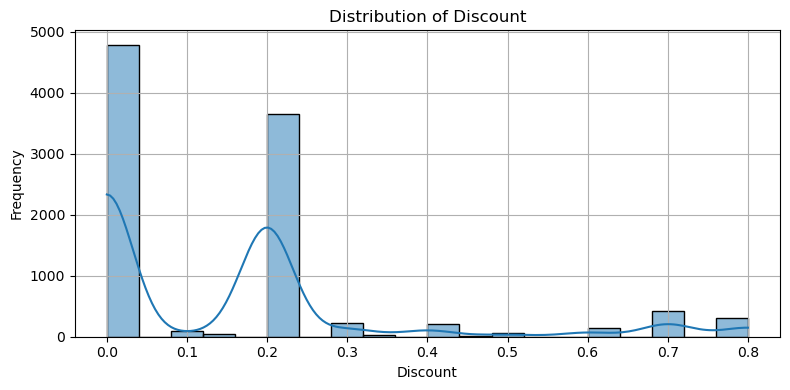

In [454]:
Explorer.plot_histogram(Orders_df, 'Discount',bins = 20)

---

##### üí∏ 3. **Discount Distribution**

* **Pattern:** Bimodal ‚Äî most orders have either:

  * **0% discount**
  * or specific discounts (like 20% or 50%).

**üìå Business Insight:**

* This suggests a **rule-based discount policy** (e.g., predefined tiers).
* Evaluate how these discount bands impact sales and profit ‚Äî some may not be yielding ROI.

---

## 2. Bivariate Analysis

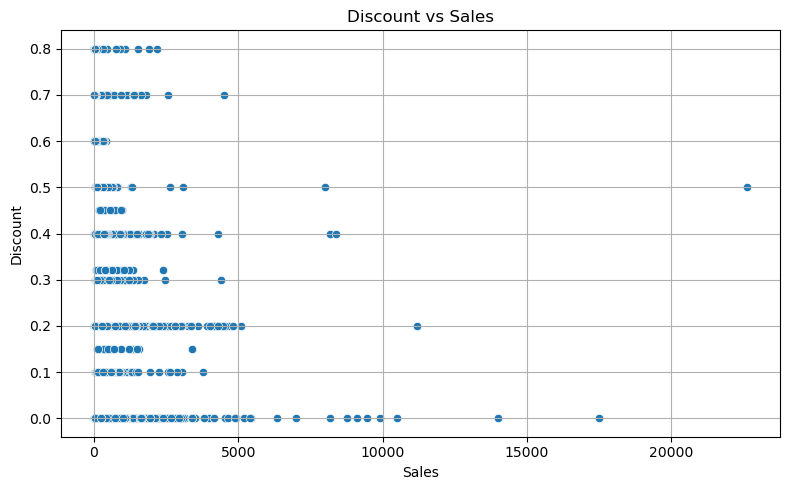

In [455]:
Explorer.plot_scatter(Orders_df,'Sales','Discount')

---

##### üîπ 1. **Discount vs. Sales**

* **Pattern:** Widely scattered, no strong visible linear relationship.
* At **0% discount**, sales are spread across all levels.
* **Heavier discounts (e.g., 20%‚Äì50%)** show a slight concentration of **lower sales values**.

**üìå Business Insight:**

* Discounts **do not clearly lead to higher sales** ‚Äî some discounted items even have low revenue.
* Suggests the need for **targeted promotions** rather than blanket discounts.
* Further analysis: check **profit** alongside **discounted sales**.

---

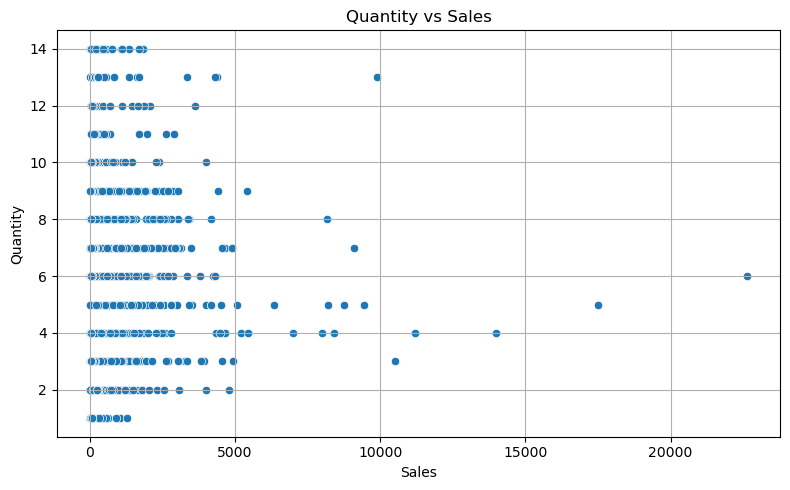

In [456]:
Explorer.plot_scatter(Orders_df,'Sales', 'Quantity')

---

##### üîπ 2. **Quantity vs. Sales**

* **Pattern:** Positive trend but with **low density** of high-quantity, high-sale orders.
* Most orders have **small quantities and low-to-mid sales**.

**üìå Business Insight:**

* As expected, more items generally mean higher sales.
* Consider **upselling or volume incentives** to shift more transactions toward higher quantity ranges.

---

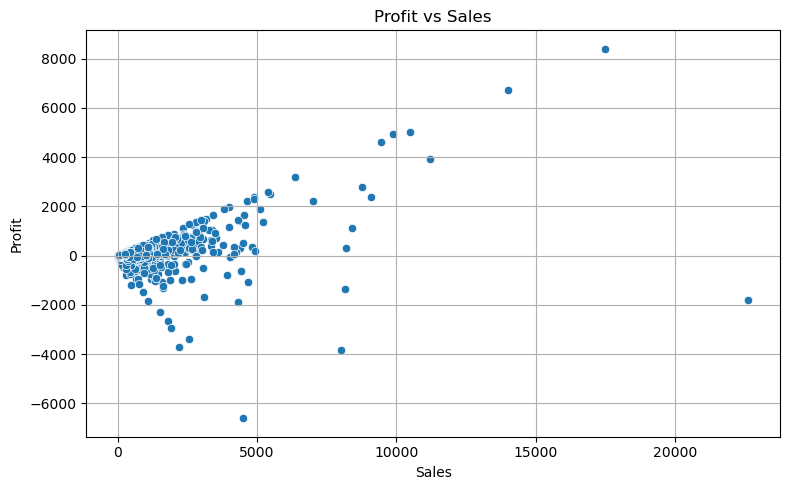

In [457]:
Explorer.plot_scatter(Orders_df,'Sales', 'Profit')

---

##### üîπ 3. **Profit vs. Sales**

* **Pattern:** Stronger positive correlation visible ‚Äî high sales generally bring high profit.
* Notably, **some high-sales orders still have low or negative profit**.

**üìå Business Insight:**

* Most profitable orders are tied to higher sales.
* But some high-sale transactions may be **undermined by discounts, returns, or high cost**.
* Recommend combining this plot with **discount level or return status** in future analysis.

---

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


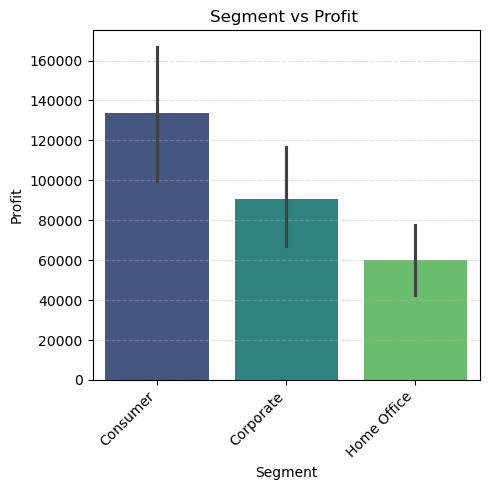

In [458]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Segment', y_col='Profit',fig_w=5,fig_l=5)

---

##### üßë‚Äçüíº 1. **Profit by Segment**

* **Observation:**

  * **Consumer** segment is the most profitable.
  * **Corporate** follows, while **Home Office** yields the least profit.

**üìå Insight:**

* Consumer-focused strategies are working well ‚Äî keep nurturing this base.
* Consider tailored offers or consulting services for Corporate/Home Office to boost their contribution.

---

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


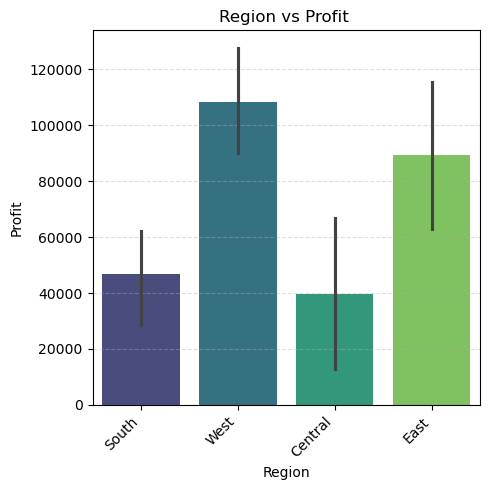

In [459]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Region', y_col='Profit',fig_w=5,fig_l=5)

---

##### üåç 2. **Profit by Region**

* **Observation:**

  * **West** and **East** are profit leaders.
  * **South** underperforms and has the lowest total profit.

**üìå Insight:**

* South may face operational inefficiencies or weak demand ‚Äî investigate further (e.g., product mix, manager performance, delivery issues).
* West is a stronghold ‚Äî ideal for pilot campaigns or new launches.

---

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


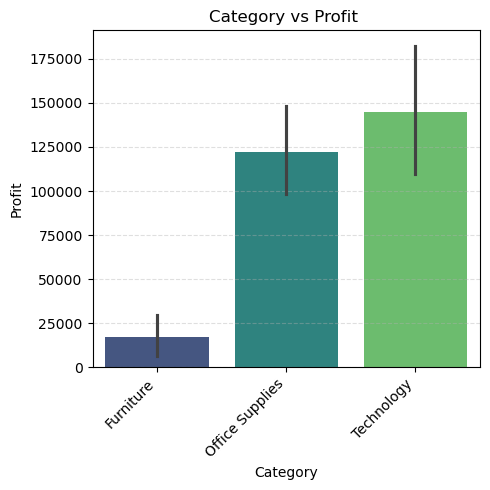

In [460]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Category', y_col='Profit',fig_w=5,fig_l=5)

---

##### üìÅ 3. **Profit by Category**

* **Observation:**

  * **Technology** is highly profitable.
  * **Office Supplies** and **Furniture** are much lower.

**üìå Insight:**

* Invest more in promoting Technology items (likely higher margin).
* Review pricing or supplier costs for Furniture and Office Supplies.

---

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


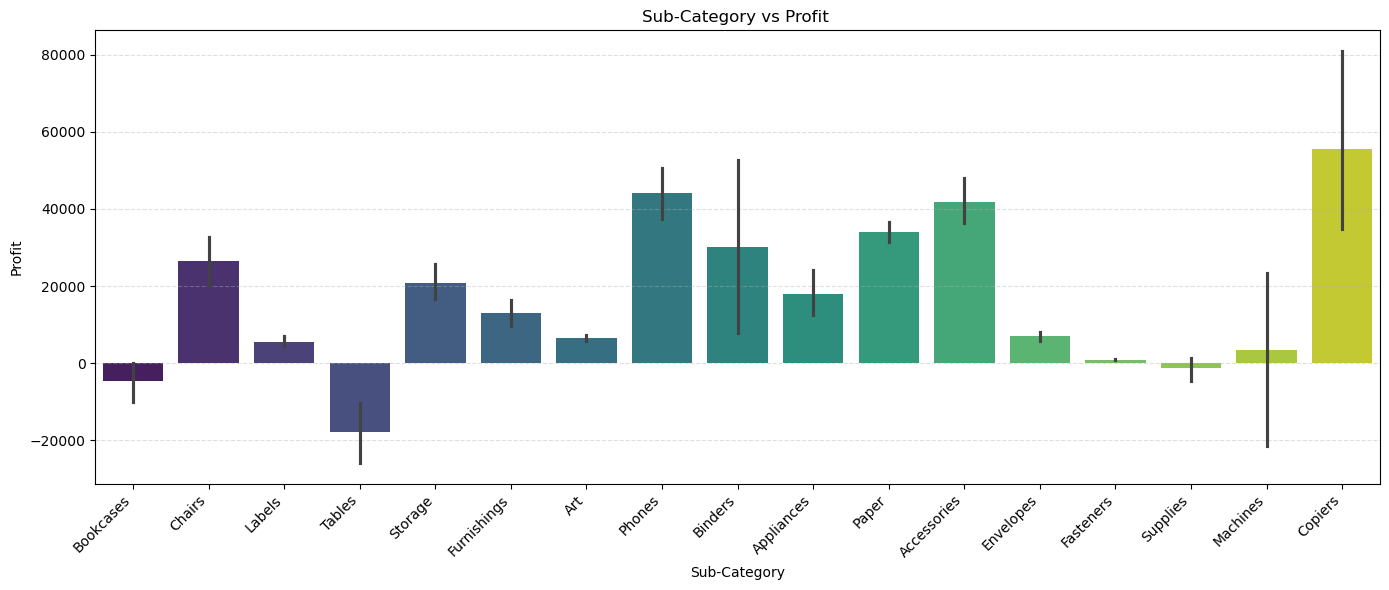

In [461]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Sub-Category', y_col='Profit',fig_w=14,fig_l=6)

---

##### üì¶ 4. **Profit by Sub-Category**

* **Observation:**

  * **Phones, Copiers, Chairs** are top profit drivers.
  * **Tables** and **Bookcases** show losses.

**üìå Insight:**

* Focus on scaling high-margin items (Phones, Copiers).
* Consider reducing inventory or revisiting pricing for low-margin/loss items like Tables.

---

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


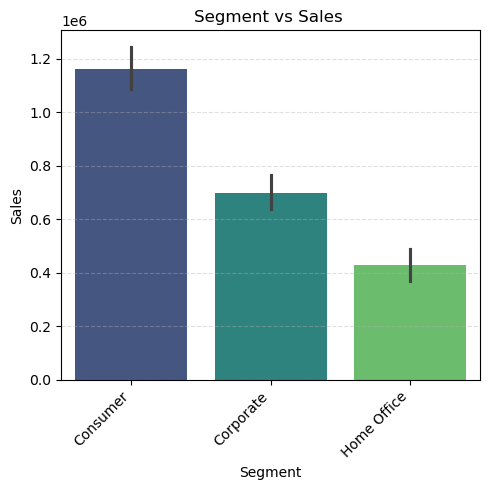

In [462]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Segment', y_col='Sales',fig_w=5,fig_l=5)

---

##### üßë‚Äçüíº 1. **Sales by Segment**

* **Observation:**

  * **Consumer** leads in total sales, followed by **Corporate**, then **Home Office**.

**üìå Insight:**

* Consumer sales are dominant ‚Äî reflect strong retail channel success.
* There's potential to grow **B2B segments** (Corporate, Home Office) through contracts or bulk incentives.

---

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


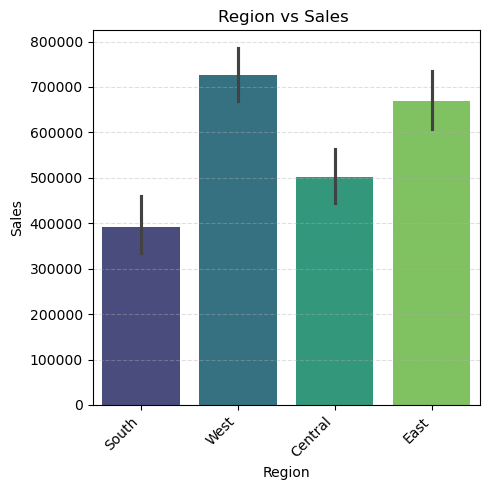

In [463]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Region', y_col='Sales',fig_w=5,fig_l=5)

---

##### üåç 2. **Sales by Region**

* **Observation:**

  * **West** generates the highest sales, followed by **East**.
  * **South** has the lowest.

**üìå Insight:**

* Prioritize marketing or fulfillment efficiency in **West** and **East**.
* Investigate low sales in **South** ‚Äî could involve pricing, logistics, or product fit.

---

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


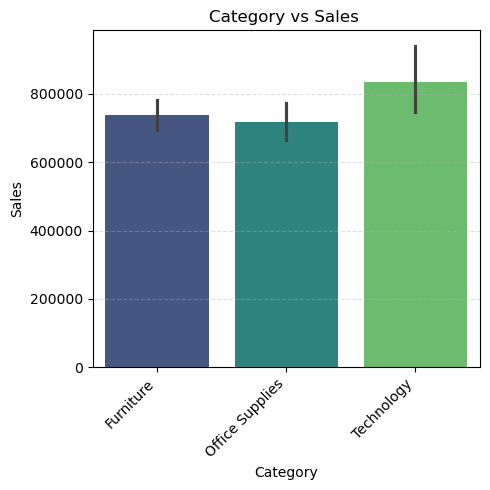

In [464]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Category', y_col='Sales',fig_w=5,fig_l=5)

---

##### üìÅ 3. **Sales by Category**

* **Observation:**

  * **Technology** leads sales by far.
  * Followed by **Office Supplies**, then **Furniture**.

**üìå Insight:**

* Technology is a high-revenue vertical ‚Äî ideal for bundling and premium product launches.
* Furniture may have higher unit value but fewer transactions ‚Äî explore leasing or showroom promotions.

---

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


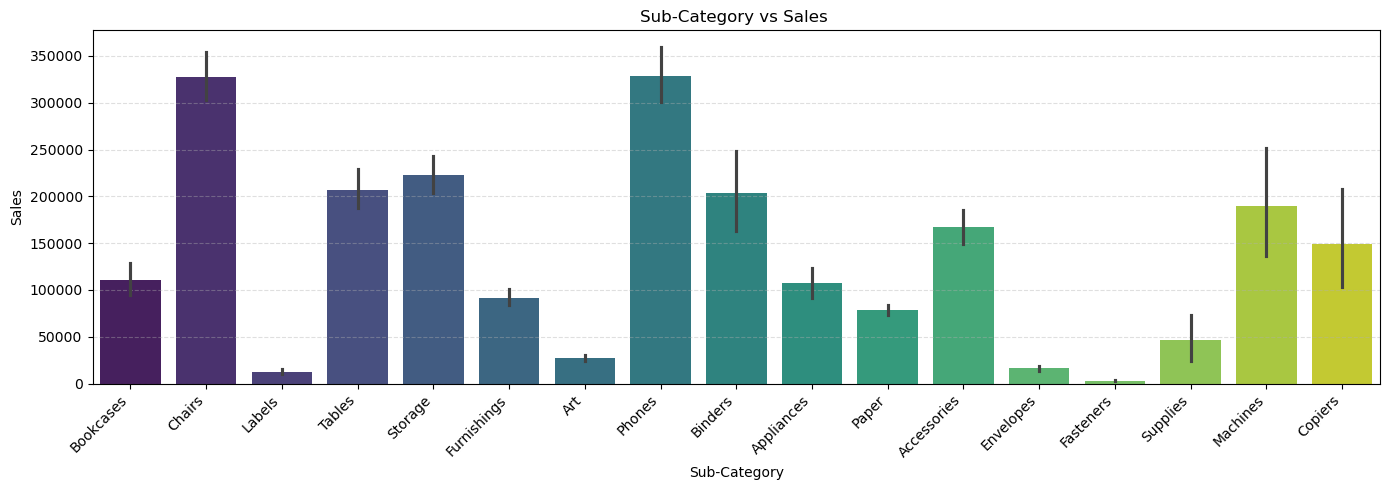

In [465]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Sub-Category', y_col='Sales',fig_w=14,fig_l=5)

---

##### üì¶ 4. **Sales by Sub-Category**

* **Observation:**

  * **Phones, Chairs, Binders** are top sales performers.
  * **Tables, Bookcases, Fasteners** have low sales.

**üìå Insight:**

* Reinforce top sub-categories with targeted ads or bundles.
* Re-evaluate underperformers: are they niche, overpriced, or poorly marketed?

---

These findings complete a **strong diagnostic overview of sales**.
Other possible drilldowns include:

* **Boxplots** (distribution insight),
* **Correlation matrix**,
* Or start **inferential/statistical comparisons** (e.g., testing sales between regions)?

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


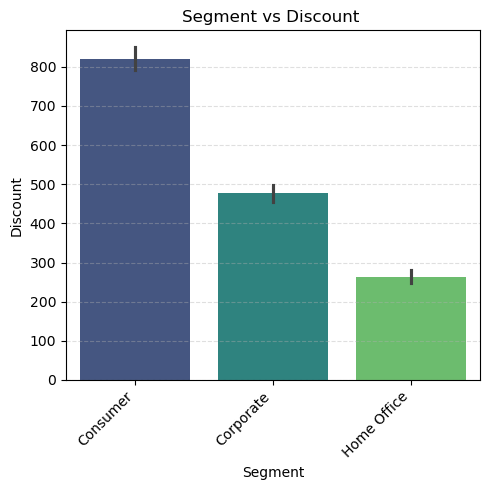

In [466]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Segment', y_col='Discount',fig_w=5,fig_l=5)

---

##### üßë‚Äçüíº 1. **Discount by Segment**

* **Observation:**

  * All segments receive **similar average discounts**, with **Corporate** slightly higher.

**üìå Insight:**

* Indicates uniform discounting policy across customer types.
* Higher discounts for **Corporate** may aim to attract bulk purchases ‚Äî ensure they maintain profit margins.

---

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


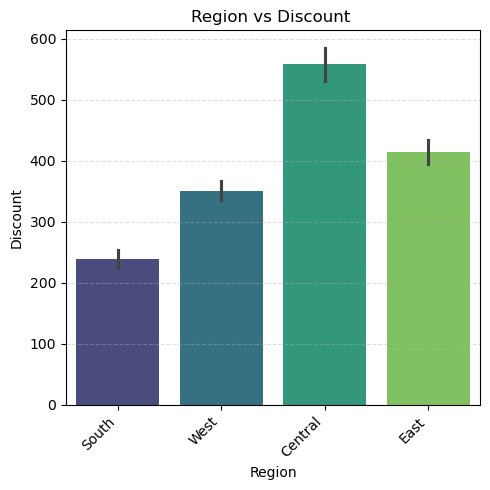

In [467]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Region', y_col='Discount',fig_w=5,fig_l=5)

---

##### üåç 2. **Discount by Region**

* **Observation:**

  * **South** and **Central** regions receive slightly higher average discounts.

**üìå Insight:**

* May reflect regional promotional strategies to boost weaker sales areas.
* Check if these discounts result in proportional sales lift or profit dilution.

---

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


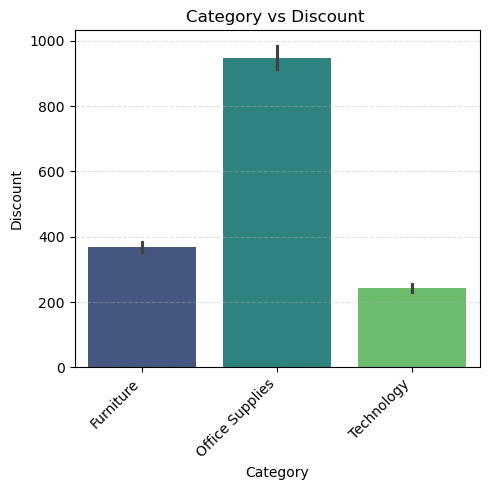

In [468]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Category', y_col='Discount',fig_w=5,fig_l=5)

---

##### üìÅ 3. **Discount by Category**

* **Observation:**

  * **Furniture** has noticeably **higher average discounts**, followed by Office Supplies and Technology.

**üìå Insight:**

* Furniture may have slower turnover or higher markup, justifying more frequent discounting.
* Investigate if higher discounts are **improving sales or harming profits**.

---

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


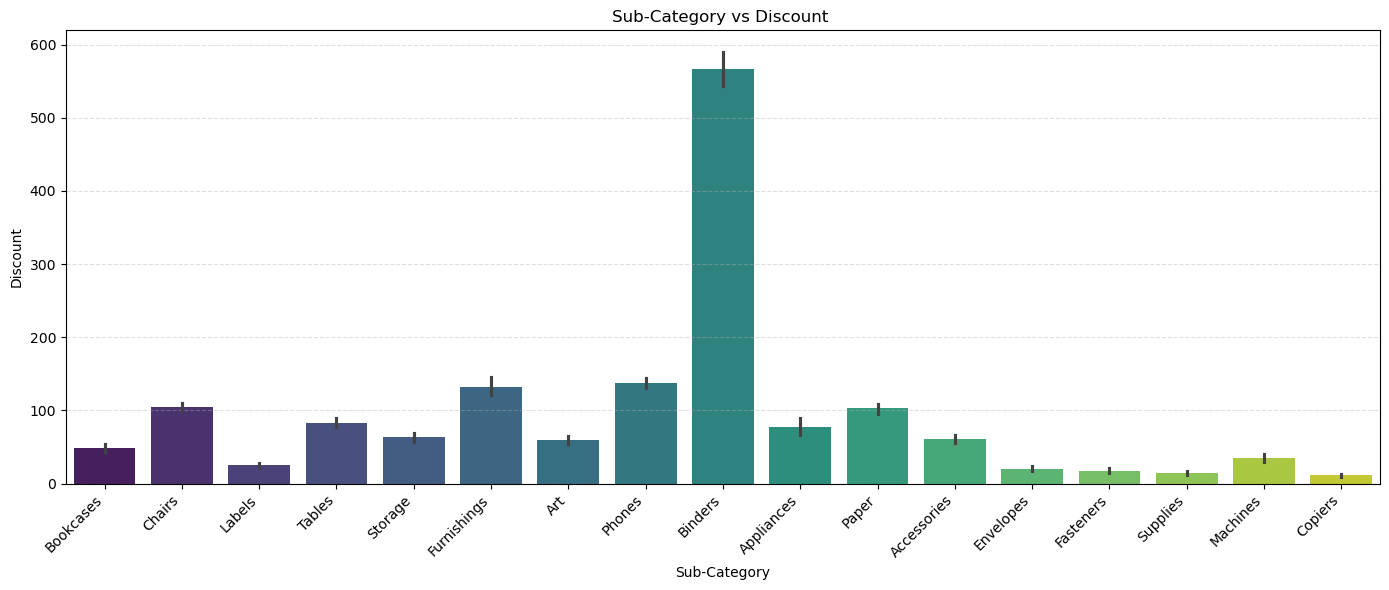

In [469]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Sub-Category', y_col='Discount',fig_w=14,fig_l=6)

---

##### üì¶ 4. **Discount by Sub-Category**

* **Observation:**

  * **Tables, Bookcases, and Binders** receive the **highest discounts**.
  * **Phones and Copiers** receive **almost no discounts**.

**üìå Insight:**

* Tables and Bookcases are likely **overstocked or low demand**, hence heavier discounts.
* Phones and Copiers are **high-demand or premium items** ‚Äî pricing power retained.

---

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


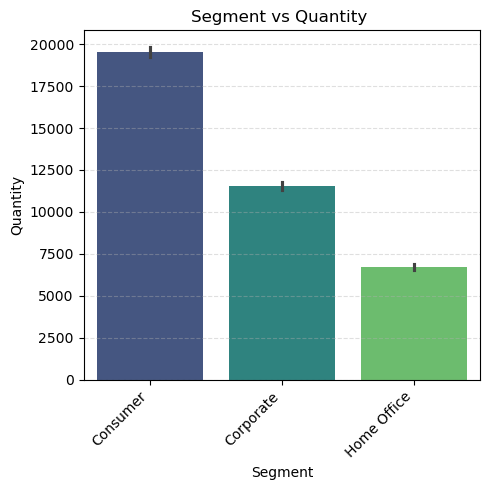

In [470]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Segment', y_col='Quantity',fig_w=5,fig_l=5)

---

##### üßë‚Äçüíº 1. **Quantity by Segment**

* **Observation:**

  * **Consumer** segment leads in total quantity purchased.
  * **Home Office** has the lowest.

**üìå Insight:**

* Consumer segment is not just high in sales but also **volume-heavy** ‚Äî may require more logistical support (e.g., packaging, delivery).
* Consider **volume discounts** or membership incentives to retain frequent buyers.

---

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


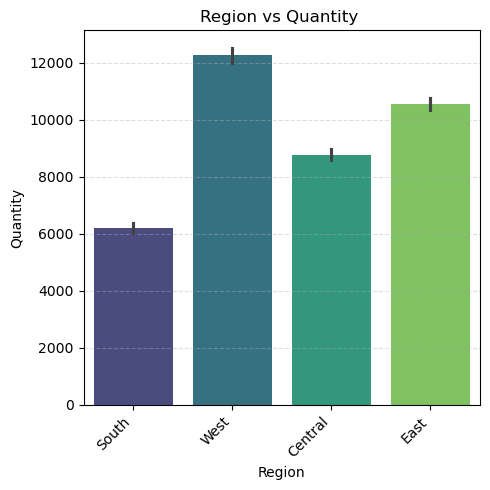

In [471]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Region', y_col='Quantity',fig_w=5,fig_l=5)

---

##### üåç 2. **Quantity by Region**

* **Observation:**

  * **West** and **East** have the highest total quantity ordered.
  * **South** remains lowest ‚Äî consistent with earlier metrics (sales, profit).

**üìå Insight:**

* Focus operations and restocking on high-volume regions.
* South may benefit from **local promotions or regional sales reps** to lift activity.

---

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


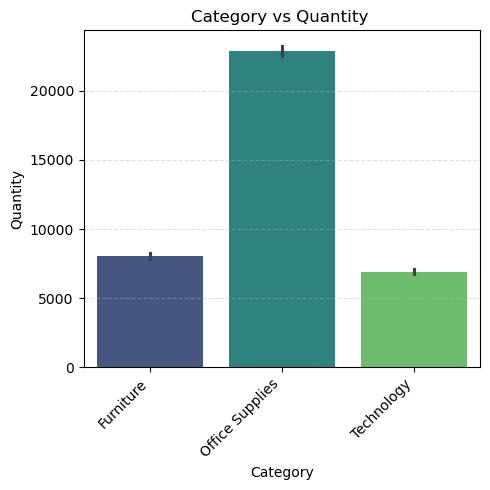

In [472]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Category', y_col='Quantity',fig_w=5,fig_l=5)

---

##### üìÅ 3. **Quantity by Category**

* **Observation:**

  * **Office Supplies** far exceed others in quantity.
  * **Technology** and **Furniture** have lower unit volumes.

**üìå Insight:**

* Office Supplies likely involve **low-price, high-volume** items (e.g., paper, pens).
* Technology and Furniture are **high-value, low-volume** products ‚Äî align marketing strategy accordingly.

---

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\4040847012.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, estimator=sum, palette='viridis')


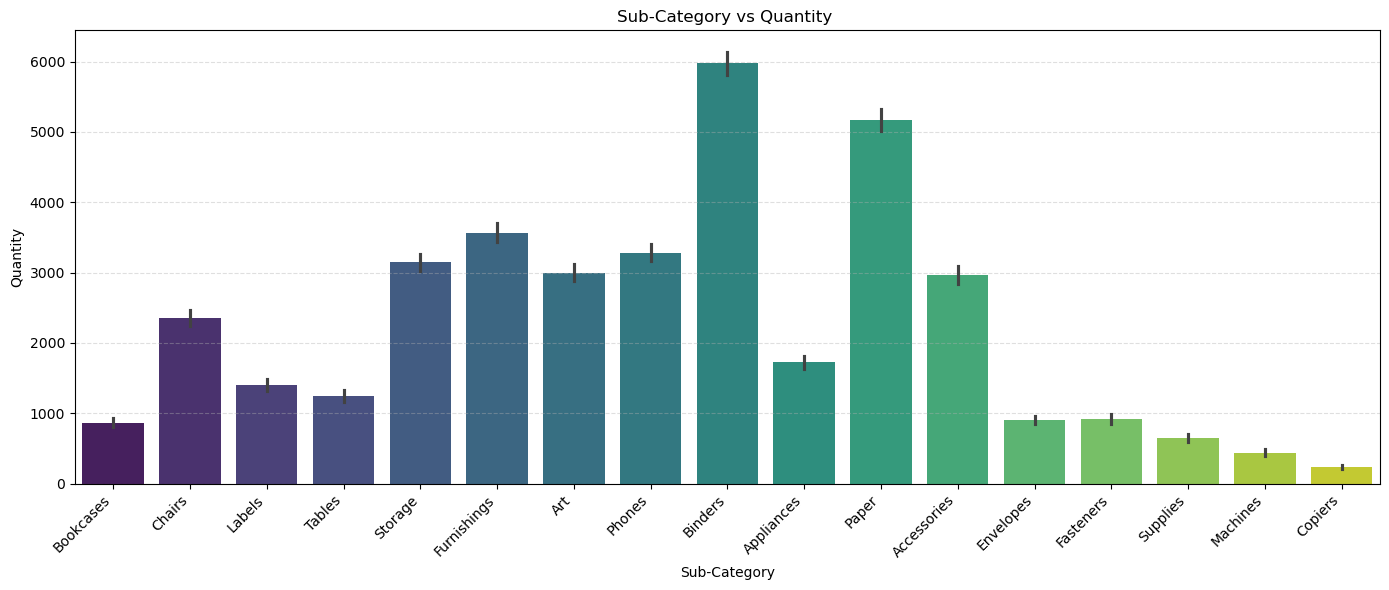

In [473]:
Explorer.plot_num_vs_cat(Orders_df, x_col='Sub-Category', y_col='Quantity',fig_w=14,fig_l=6)

---

##### üì¶ 4. **Quantity by Sub-Category**

* **Observation:**

  * **Binders, Paper, and Furnishings** top the list in quantity.
  * **Copiers, Tables, Fasteners** have lowest quantities.

**üìå Insight:**

* High-quantity items require **streamlined stocking and quick fulfillment**.
* For low-volume products, review demand trends and adjust purchasing cycles to reduce holding costs.

---

## 3. Time Series Exploration¬∂

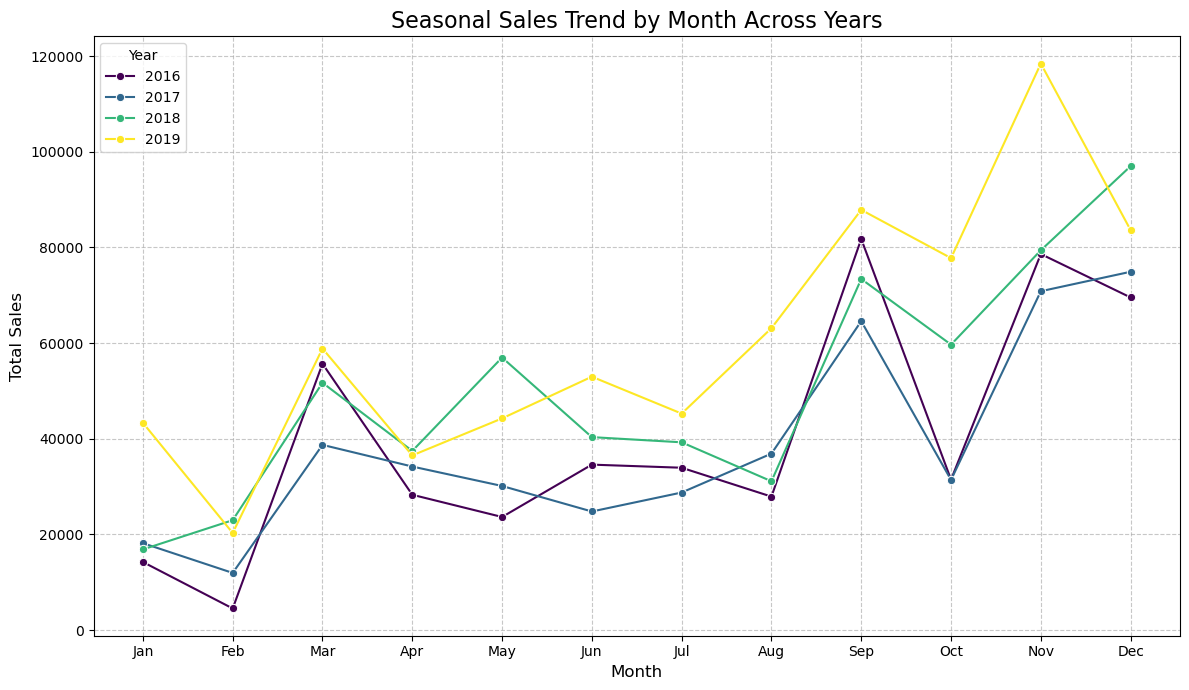

In [474]:
# Sales by Month across years
plt.figure(figsize=(12, 7))
sns.lineplot(x='Order Date_Month', y='Sales', hue='Order Date_Year', data=Orders_df,
             estimator='sum', palette='viridis', marker='o', errorbar=None) 
plt.title('Seasonal Sales Trend by Month Across Years', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

---
##### This chart shows **how sales vary month-by-month**, with each line representing a different year. It allows you to compare **monthly seasonality** across multiple years.
---

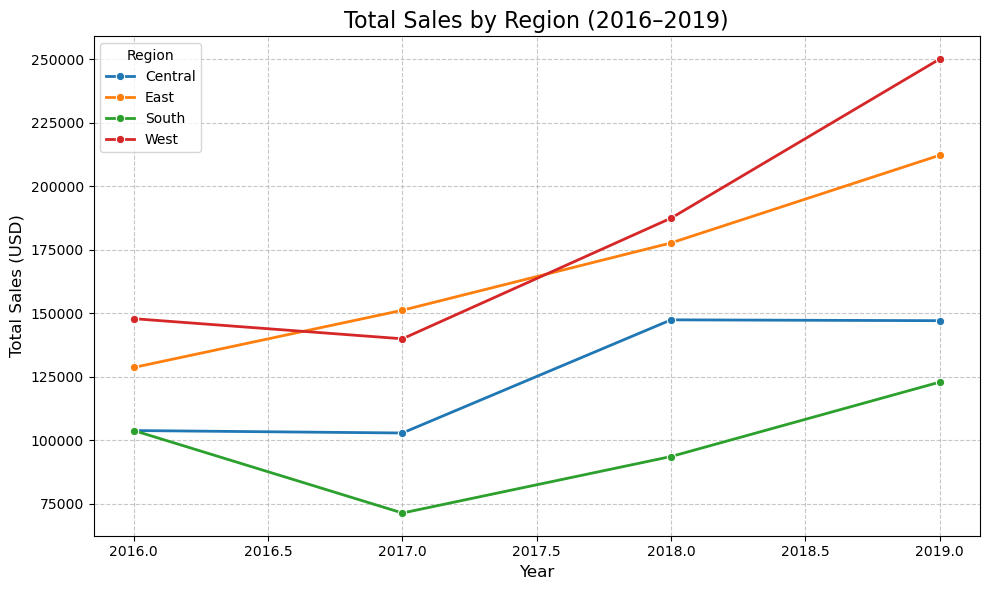

In [475]:
# Sales by region accross the years
sales_by_region_by_year = Orders_df.groupby(['Order Date_Year', 'Region'])['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_region_by_year, x='Order Date_Year', y='Sales', hue='Region', marker='o', linewidth=2)

plt.title('Total Sales by Region (2016‚Äì2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

---
##### üìä A line chart showing the year-over-year sales for each region between 2016 and 2019.
---

# 6. Diagnostic Analysis¬∂

### ‚úÖ a. % Difference Between Regions (2018 ‚Üí 2019)

C:\Users\ajibo\AppData\Local\Temp\ipykernel_12336\3574653350.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pct_diff_df, x='Region', y='Percent_Change', palette='Set2')


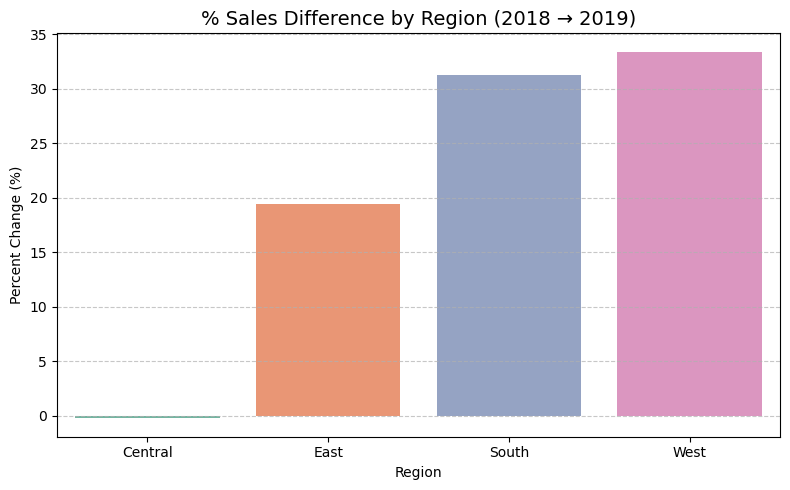

In [476]:
# Group sales for 2018 and 2019 by region
region_sales = Orders_df[Orders_df['Order Date_Year'].isin([2018, 2019])].groupby(['Order Date_Year', 'Region'])['Sales'].sum().unstack()

# Calculate % difference
pct_diff = ((region_sales.loc[2019] - region_sales.loc[2018]) / region_sales.loc[2018]) * 100
pct_diff_df = pct_diff.reset_index()
pct_diff_df.columns = ['Region', 'Percent_Change']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=pct_diff_df, x='Region', y='Percent_Change', palette='Set2')
plt.title('% Sales Difference by Region (2018 ‚Üí 2019)', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Percent Change (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---
##### üìä A bar chart showing the year-over-year percentage change in sales for each region between 2018 and 2019.
---

### ‚úÖ b. Sum of Sales for Central Region (2016‚Äì2019)

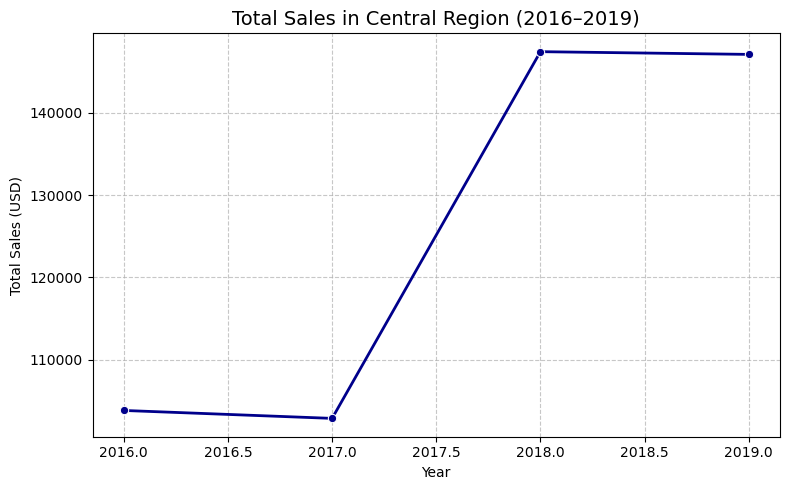

In [477]:
central_sales = Orders_df[Orders_df['Region'] == 'Central'].groupby('Order Date_Year')['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=central_sales, x='Order Date_Year', y='Sales', marker='o', linewidth=2, color='darkblue')
plt.title('Total Sales in Central Region (2016‚Äì2019)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Sales (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


---
##### üìà A line chart visualizing annual total sales in the Central region to observe growth or stagnation trends.
---

### ‚úÖ c. Sum of Sales for Segments in Central per Year

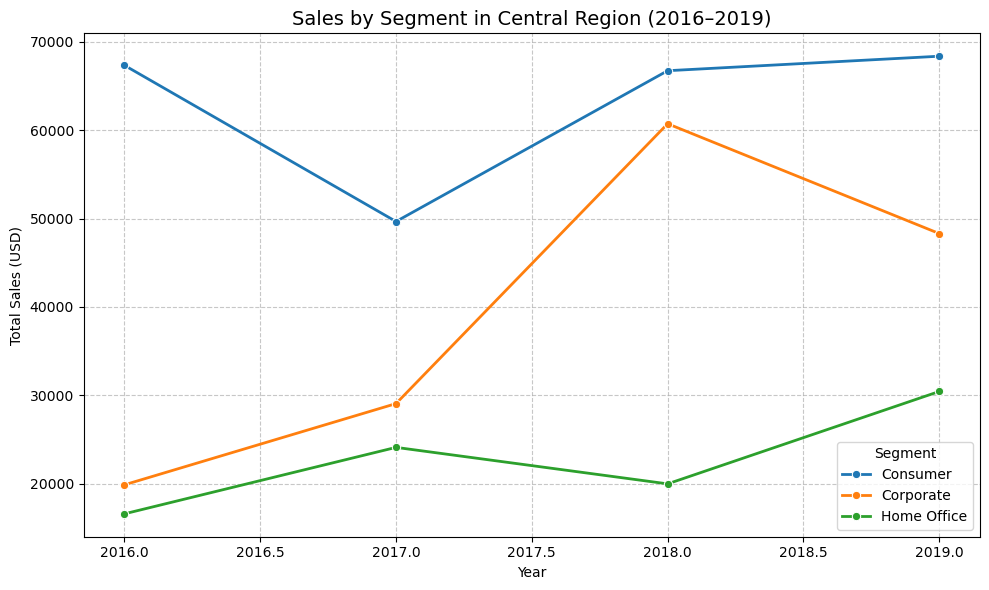

In [478]:
central_segment = Orders_df[Orders_df['Region'] == 'Central'].groupby(['Order Date_Year', 'Segment'])['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=central_segment, x='Order Date_Year', y='Sales', hue='Segment', marker='o', linewidth=2)
plt.title('Sales by Segment in Central Region (2016‚Äì2019)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Sales (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


---
##### üìä A multi-line chart showing how each segment performed per year in Central, helping to identify contributing or declining segments.
---

### ‚úÖ d. Sum of Sales for Categories in Consumer Segment of Central Region

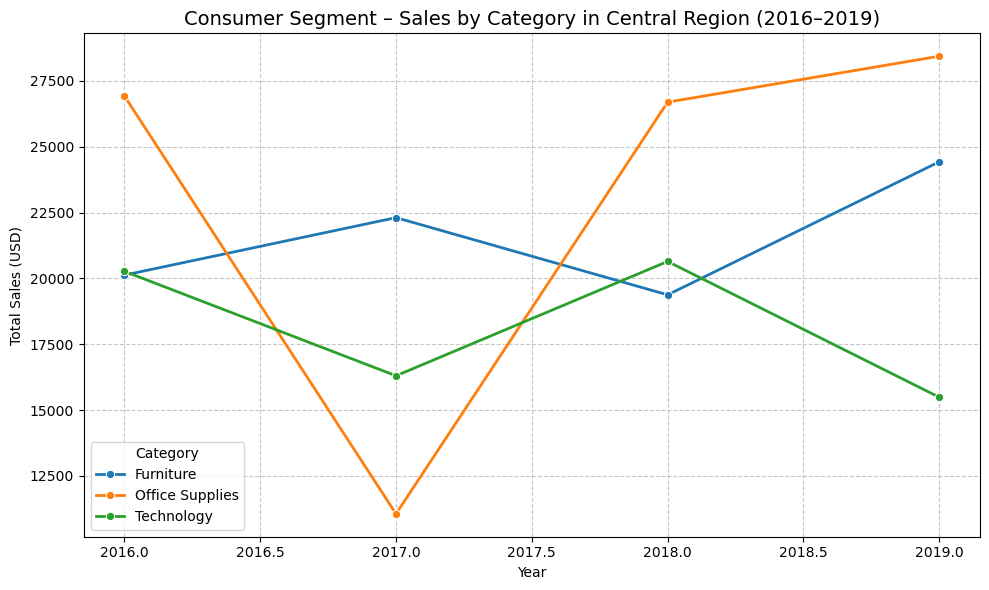

In [479]:
# Category performance under the Consumer segment
segment = 'Consumer' 
filtered = Orders_df[(Orders_df['Region'] == 'Central') & (Orders_df2['Segment'] == segment)]
category_sales = filtered.groupby(['Order Date_Year', 'Category'])['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=category_sales, x='Order Date_Year', y='Sales', hue='Category', marker='o', linewidth=2)
plt.title(f'{segment} Segment ‚Äì Sales by Category in Central Region (2016‚Äì2019)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Sales (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


---
##### üìà A breakdown of Category performance under the Consumer segment within Central across 4 years.
---

In [480]:
# Corporate performance under the Consumer segment

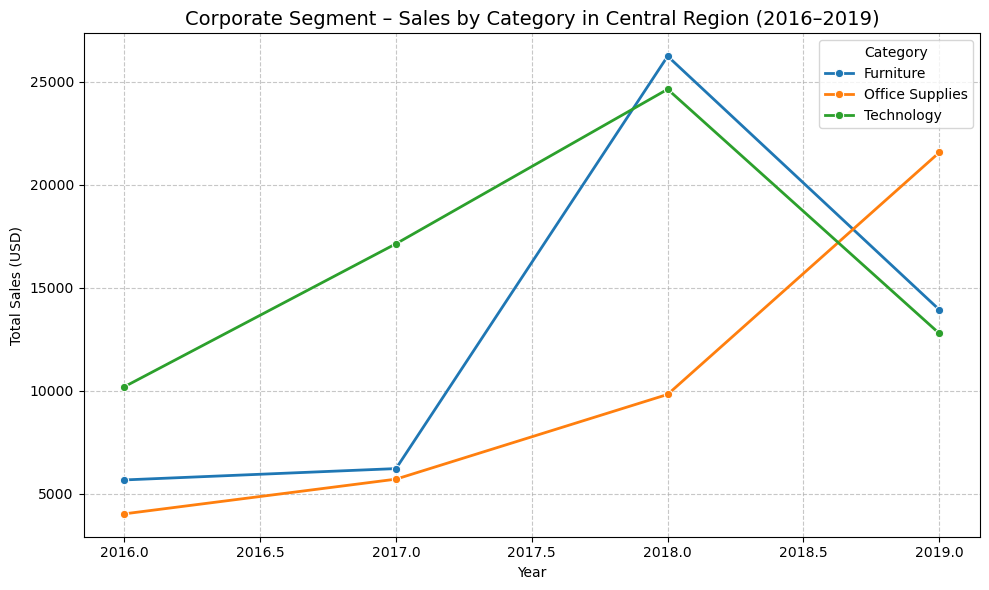

In [481]:
segment = 'Corporate'  # Change to 'Corporate' or 'Home Office' as needed
filtered = Orders_df[(Orders_df['Region'] == 'Central') & (Orders_df2['Segment'] == segment)]
category_sales = filtered.groupby(['Order Date_Year', 'Category'])['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=category_sales, x='Order Date_Year', y='Sales', hue='Category', marker='o', linewidth=2)
plt.title(f'{segment} Segment ‚Äì Sales by Category in Central Region (2016‚Äì2019)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Sales (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


---
##### üìà A breakdown of Corporate performance under the Consumer segment within Central across 4 years.
---

In [482]:
# Home Office performance under the Consumer segment

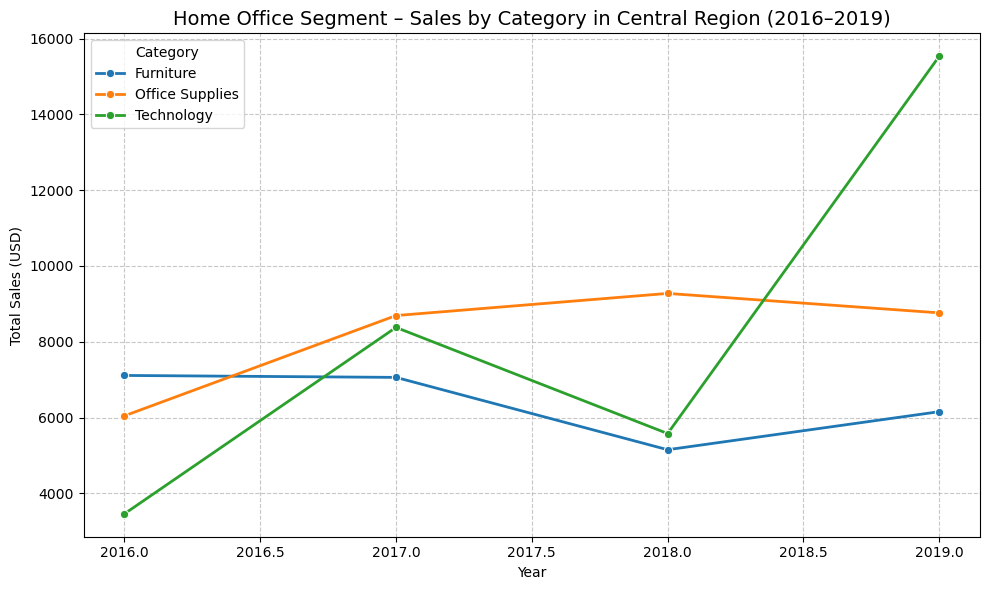

In [483]:
segment = 'Home Office'  # Change to 'Corporate' or 'Home Office' as needed
filtered = Orders_df[(Orders_df['Region'] == 'Central') & (Orders_df2['Segment'] == segment)]
category_sales = filtered.groupby(['Order Date_Year', 'Category'])['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=category_sales, x='Order Date_Year', y='Sales', hue='Category', marker='o', linewidth=2)
plt.title(f'{segment} Segment ‚Äì Sales by Category in Central Region (2016‚Äì2019)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Sales (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

---
##### üìà A breakdown of Home Office performance under the Consumer segment within Central across 4 years.
---